# TMD 2024
### Lucas Poma
## Trabajo Practico Final

## Imports

In [1]:
library(ggplot2)
library(MASS)
library(cluster)
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




### Comparar Clusters

In [2]:
# Step 2: Define a helper function to create and display confusion matrices with optimized matching
compare_clusters <- function(true_labels, predicted_clusters, title) {
    # Convert true labels to factors if they are not already
    true_labels <- as.factor(true_labels)

    # Create a confusion matrix
    confusion_matrix <- table(True = true_labels, Predicted = predicted_clusters)

    # Use matchClasses to find the optimal permutation of predicted clusters
    class.match <- matchClasses(as.matrix(confusion_matrix), method = "exact")

    # Reorder the confusion matrix using the optimal match
    optimized_confusion_matrix <- confusion_matrix[, class.match]

    # Calculate accuracy using the optimized confusion matrix
    accuracy <- sum(diag(optimized_confusion_matrix)) / sum(optimized_confusion_matrix)

    print(title)
    print(optimized_confusion_matrix)
    print("----------------------------------------------------")
}

## Ejercicio 1

### Crabs

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

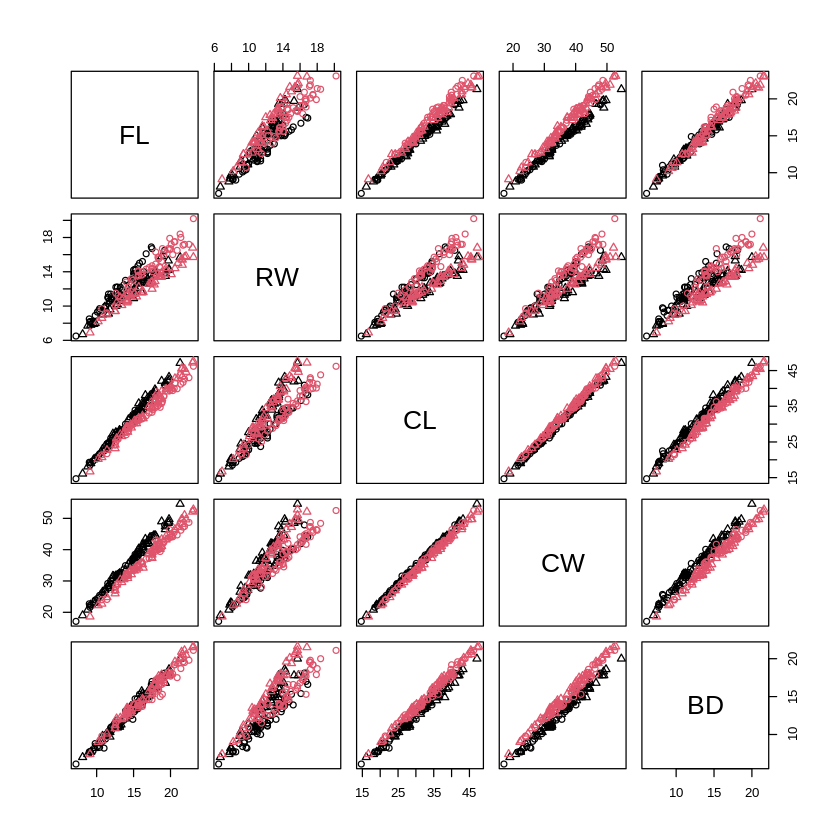

In [ ]:
data(crabs)
summary(crabs)
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))

In [ ]:
crabs.log <- log(crabs[, 4:8])
crabs.scaled <- scale(crabs.log)
crabs.scaled.pca <- prcomp(crabs.scaled, scale = FALSE)
crabs.pca.scaled <- scale(prcomp(crabs.log, scale = FALSE)$x)

true_species <- crabs[, 1]  # Species 
true_gender <- crabs[, 2]   # Gender 

In [ ]:
kmeans.log <- kmeans(crabs.log, centers = 2, nstart = 10)
kmeans.scaled <- kmeans(crabs.scaled, centers = 2, nstart = 10)
kmeans.scaled.pca <- kmeans(crabs.scaled.pca$x, centers = 2, nstart = 10)
kmeans.pca.scaled <- kmeans(crabs.pca.scaled, centers = 2, nstart = 10)

pam.log <- pam(crabs.log, k = 2, )
pam.scaled <- pam(crabs.scaled, k = 2)
pam.scaled.pca <- pam(crabs.scaled.pca$x, k = 2)
pam.pca.scaled <- pam(crabs.pca.scaled, k = 2)

hc.log.average <- hclust(dist(crabs.log), method = "average")
hc.scaled.average <- hclust(dist(crabs.scaled), method = "average")
hc.scaled.pca.average <- hclust(dist(crabs.scaled.pca$x), method = "average")
hc.pca.scaled.average <- hclust(dist(crabs.pca.scaled), method = "average")

hc.log.single <- hclust(dist(crabs.log), method = "single")
hc.scaled.single <- hclust(dist(crabs.scaled), method = "single")
hc.scaled.pca.single <- hclust(dist(crabs.scaled.pca$x), method = "single")
hc.pca.scaled.single <- hclust(dist(crabs.pca.scaled), method = "single")

hc.log.complete <- hclust(dist(crabs.log), method = "complete")
hc.scaled.complete <- hclust(dist(crabs.scaled), method = "complete")
hc.scaled.pca.complete <- hclust(dist(crabs.scaled.pca$x), method = "complete")
hc.pca.scaled.complete <- hclust(dist(crabs.pca.scaled), method = "complete")

In [ ]:
compare_clusters(true_species, kmeans.log$cluster, "K-means (Log-transformed Data) vs Species")
compare_clusters(true_gender, kmeans.log$cluster, "K-means (Log-transformed Data) vs Gender")

compare_clusters(true_species, kmeans.scaled$cluster, "K-means (Scaled Data) vs Species")
compare_clusters(true_gender, kmeans.scaled$cluster, "K-means (Scaled Data) vs Gender")

compare_clusters(true_species, kmeans.scaled.pca$cluster, "K-means (PCA Scaled Data) vs Species")
compare_clusters(true_gender, kmeans.scaled.pca$cluster, "K-means (PCA Scaled Data) vs Gender")

compare_clusters(true_species, kmeans.pca.scaled$cluster, "K-means (PCA + Scaled Data) vs Species")
compare_clusters(true_gender, kmeans.pca.scaled$cluster, "K-means (PCA + Scaled Data) vs Gender")

compare_clusters(true_species, pam.log$clustering, "PAM (Log-transformed Data) vs Species")
compare_clusters(true_gender, pam.log$clustering, "PAM (Log-transformed Data) vs Gender")

compare_clusters(true_species, pam.scaled$clustering, "PAM (Scaled Data) vs Species")
compare_clusters(true_gender, pam.scaled$clustering, "PAM (Scaled Data) vs Gender")

compare_clusters(true_species, pam.scaled.pca$clustering, "PAM (PCA Scaled Data) vs Species")
compare_clusters(true_gender, pam.scaled.pca$clustering, "PAM (PCA Scaled Data) vs Gender")

compare_clusters(true_species, pam.pca.scaled$clustering, "PAM (PCA + Scaled Data) vs Species")
compare_clusters(true_gender, pam.pca.scaled$clustering, "PAM (PCA + Scaled Data) vs Gender")

linkage_methods <- c("average", "single", "complete")
for (method in linkage_methods) {
    hc.log <- hclust(dist(crabs.log), method = method)
    hc.scaled <- hclust(dist(crabs.scaled), method = method)
    hc.scaled.pca <- hclust(dist(crabs.scaled.pca$x), method = method)
    hc.pca.scaled <- hclust(dist(crabs.pca.scaled), method = method)

    hc_clusters_log <- cutree(hc.log, k = 2)
    hc_clusters_scaled <- cutree(hc.scaled, k = 2)
    hc_clusters_scaled_pca <- cutree(hc.scaled.pca, k = 2)
    hc_clusters_pca_scaled <- cutree(hc.pca.scaled, k = 2)

    compare_clusters(true_species, hc_clusters_log, paste("Hierarchical Clustering (Log-transformed Data, Method =", method, ") vs Species"))
    compare_clusters(true_gender, hc_clusters_log, paste("Hierarchical Clustering (Log-transformed Data, Method =", method, ") vs Gender"))

    compare_clusters(true_species, hc_clusters_scaled, paste("Hierarchical Clustering (Scaled Data, Method =", method, ") vs Species"))
    compare_clusters(true_gender, hc_clusters_scaled, paste("Hierarchical Clustering (Scaled Data, Method =", method, ") vs Gender"))

    compare_clusters(true_species, hc_clusters_scaled_pca, paste("Hierarchical Clustering (PCA Scaled Data, Method =", method, ") vs Species"))
    compare_clusters(true_gender, hc_clusters_scaled_pca, paste("Hierarchical Clustering (PCA Scaled Data, Method =", method, ") vs Gender"))

    compare_clusters(true_species, hc_clusters_pca_scaled, paste("Hierarchical Clustering (PCA + Scaled Data, Method =", method, ") vs Species"))
    compare_clusters(true_gender, hc_clusters_pca_scaled, paste("Hierarchical Clustering (PCA + Scaled Data, Method =", method, ") vs Gender"))
}

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
[1] "K-means (Log-transformed Data) vs Species"
    Predicted
True  2  1
   B 48 52
   O 27 73
[1] "----------------------------------------------------"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
[1] "K-means (Log-transformed Data) vs Gender"
    Predicted
True  1  2
   F 64 36
   M 61 39
[1] "----------------------------------------------------"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
[1] "K-means (Scaled Data) vs Species"
    Predicted
True  2  1
   B 48 52
   O 27 73
[1] "----------------------------------------------------"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
[1] "K-means (Scaled Data) vs Gender"
    Predicted
True  1  2
   F 64 36
   M 61 39
[1] "--------------------------------------------------

#### Comentarios
Para analizar este dataset, utilizamos diversas combinaciones de escalado y PCA, todas aplicadas sobre la transformación logarítmica de los datos.

A continuación, aplicamos los métodos K-Means, PAM y árboles jerárquicos (en sus variantes de single linkage, average y complete) y comparamos las soluciones obtenidas con las clases originales.

El mejor enfoque para la separación de clases entre especies fue aplicar primero PCA, luego escalar los datos resultantes y finalmente utilizar K-Means, logrando un 100% de acierto en la clasificación.

Sin embargo, en el caso del género, ningún método obtuvo buenos resultados.

Como podemos observar en el gráfico, parece ser mucho más difícil separar el género que las especies en este dataset.

### Lampone

   anno         m33              m34              m35             m36         
 2006:19   Min.   : 13.31   Min.   :0.1600   Min.   :0.020   Min.   :0.00000  
 2007:30   1st Qu.: 37.70   1st Qu.:0.3900   1st Qu.:0.060   1st Qu.:0.01000  
           Median : 63.97   Median :0.6500   Median :0.110   Median :0.01000  
           Mean   : 69.47   Mean   :0.7751   Mean   :0.132   Mean   :0.01143  
           3rd Qu.: 80.30   3rd Qu.:0.9800   3rd Qu.:0.170   3rd Qu.:0.01000  
           Max.   :255.31   Max.   :2.9500   Max.   :0.540   Max.   :0.02000  
                                                                              
      m40         m41              m42               m43       
 Min.   :0   Min.   :0.0600   Min.   :0.01000   Min.   : 1.49  
 1st Qu.:0   1st Qu.:0.1400   1st Qu.:0.02000   1st Qu.: 5.45  
 Median :0   Median :0.2500   Median :0.03000   Median :10.42  
 Mean   :0   Mean   :0.2818   Mean   :0.03449   Mean   :15.09  
 3rd Qu.:0   3rd Qu.:0.3700   3rd Qu.:0.04000   

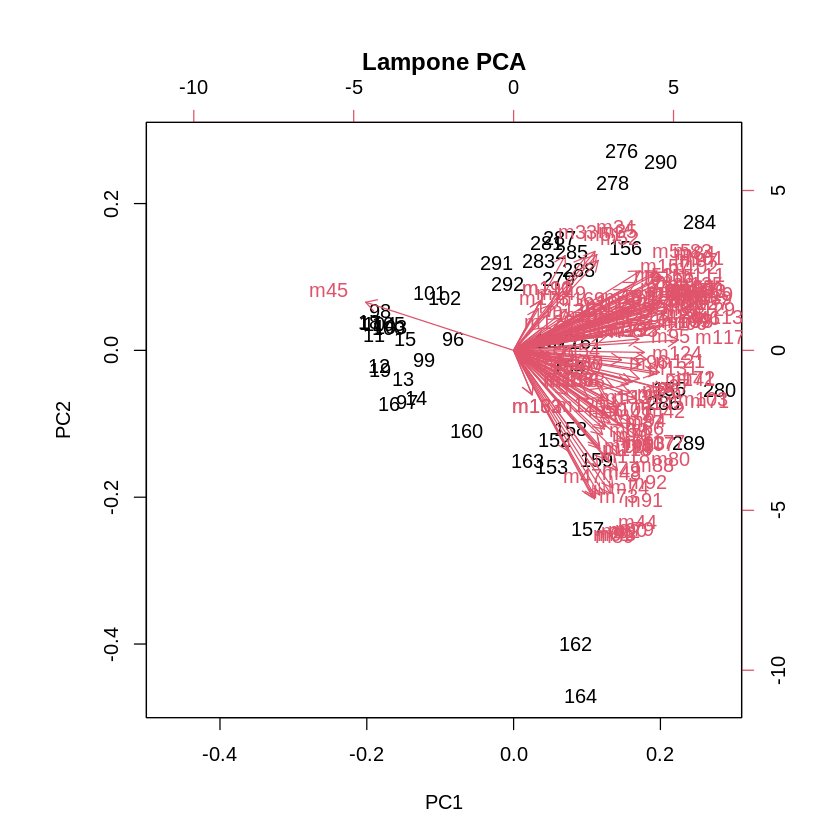

In [ ]:
load("lampone.Rdata")
summary(lampone)

lampone.feat <- lampone[, -c(1, 143, 144)]
lampone.classes <- lampone[, c(1, 143)]

lampone.feat <- lampone.feat[, apply(lampone.feat, 2, var) != 0]

lampone.pca <- prcomp(lampone.feat, scale = TRUE)
biplot(lampone.pca, main = "Lampone PCA")

In [ ]:
lampone.log <- log(lampone.feat + 1)
lampone.log <- lampone.log[, apply(lampone.log, 2, var) != 0]
lampone.scaled <- scale(lampone.log)
lampone.scaled.pca <- prcomp(lampone.scaled, scale = FALSE)
lampone.pca.scaled <- scale(prcomp(lampone.log, scale = FALSE)$x)

true_anno <- lampone.classes[, 1]
true_type <- lampone.classes[, 2]

In [ ]:
kmeans.log <- kmeans(lampone.log, centers = 2, nstart = 10)
kmeans.scaled <- kmeans(lampone.scaled, centers = 2, nstart = 10)
kmeans.scaled.pca <- kmeans(lampone.scaled.pca$x, centers = 2, nstart = 10)
kmeans.pca.scaled <- kmeans(lampone.pca.scaled, centers = 2, nstart = 10)

pam.log <- pam(lampone.log, k = 2, )
pam.scaled <- pam(lampone.scaled, k = 2)
pam.scaled.pca <- pam(lampone.scaled.pca$x, k = 2)
pam.pca.scaled <- pam(lampone.pca.scaled, k = 2)

hc.log.average <- hclust(dist(lampone.log), method = "average")
hc.scaled.average <- hclust(dist(lampone.scaled), method = "average")
hc.scaled.pca.average <- hclust(dist(lampone.scaled.pca$x), method = "average")
hc.pca.scaled.average <- hclust(dist(lampone.pca.scaled), method = "average")

hc.log.single <- hclust(dist(lampone.log), method = "single")
hc.scaled.single <- hclust(dist(lampone.scaled), method = "single")
hc.scaled.pca.single <- hclust(dist(lampone.scaled.pca$x), method = "single")
hc.pca.scaled.single <- hclust(dist(lampone.pca.scaled), method = "single")

hc.log.complete <- hclust(dist(lampone.log), method = "complete")
hc.scaled.complete <- hclust(dist(lampone.scaled), method = "complete")
hc.scaled.pca.complete <- hclust(dist(lampone.scaled.pca$x), method = "complete")
hc.pca.scaled.complete <- hclust(dist(lampone.pca.scaled), method = "complete")

In [ ]:
compare_clusters(true_anno, kmeans.log$cluster, "K-means (Log-transformed Data) vs Anno")
compare_clusters(true_type, kmeans.log$cluster, "K-means (Log-transformed Data) vs Type")

compare_clusters(true_anno, kmeans.scaled$cluster, "K-means (Scaled Data) vs Anno")
compare_clusters(true_type, kmeans.scaled$cluster, "K-means (Scaled Data) vs Type")

compare_clusters(true_anno, kmeans.scaled.pca$cluster, "K-means (PCA Scaled Data) vs Anno")
compare_clusters(true_type, kmeans.scaled.pca$cluster, "K-means (PCA Scaled Data) vs Type")

compare_clusters(true_anno, kmeans.pca.scaled$cluster, "K-means (PCA + Scaled Data) vs Anno")
compare_clusters(true_type, kmeans.pca.scaled$cluster, "K-means (PCA + Scaled Data) vs Type")

# Compare PAM clustering results with actual classes
compare_clusters(true_anno, pam.log$clustering, "PAM (Log-transformed Data) vs Anno")
compare_clusters(true_type, pam.log$clustering, "PAM (Log-transformed Data) vs Type")

compare_clusters(true_anno, pam.scaled$clustering, "PAM (Scaled Data) vs Anno")
compare_clusters(true_type, pam.scaled$clustering, "PAM (Scaled Data) vs Type")

compare_clusters(true_anno, pam.scaled.pca$clustering, "PAM (PCA Scaled Data) vs Anno")
compare_clusters(true_type, pam.scaled.pca$clustering, "PAM (PCA Scaled Data) vs Type")

compare_clusters(true_anno, pam.pca.scaled$clustering, "PAM (PCA + Scaled Data) vs Anno")
compare_clusters(true_type, pam.pca.scaled$clustering, "PAM (PCA + Scaled Data) vs Type")

linkage_methods <- c("average", "single", "complete")
for (method in linkage_methods) {
    hc.log <- hclust(dist(lampone.log), method = method)
    hc.scaled <- hclust(dist(lampone.scaled), method = method)
    hc.scaled.pca <- hclust(dist(lampone.scaled.pca$x), method = method)
    hc.pca.scaled <- hclust(dist(lampone.pca.scaled), method = method)

    hc_clusters_log <- cutree(hc.log, k = 2)
    hc_clusters_scaled <- cutree(hc.scaled, k = 2)
    hc_clusters_scaled_pca <- cutree(hc.scaled.pca, k = 2)
    hc_clusters_pca_scaled <- cutree(hc.pca.scaled, k = 2)

    compare_clusters(true_anno, hc_clusters_log, paste("Hierarchical Clustering (Log-transformed Data, Method =", method, ") vs Anno"))
    compare_clusters(true_type, hc_clusters_log, paste("Hierarchical Clustering (Log-transformed Data, Method =", method, ") vs Type"))

    compare_clusters(true_anno, hc_clusters_scaled, paste("Hierarchical Clustering (Scaled Data, Method =", method, ") vs Anno"))
    compare_clusters(true_type, hc_clusters_scaled, paste("Hierarchical Clustering (Scaled Data, Method =", method, ") vs Type"))

    compare_clusters(true_anno, hc_clusters_scaled_pca, paste("Hierarchical Clustering (PCA Scaled Data, Method =", method, ") vs Anno"))
    compare_clusters(true_type, hc_clusters_scaled_pca, paste("Hierarchical Clustering (PCA Scaled Data, Method =", method, ") vs Type"))

    compare_clusters(true_anno, hc_clusters_pca_scaled, paste("Hierarchical Clustering (PCA + Scaled Data, Method =", method, ") vs Anno"))
    compare_clusters(true_type, hc_clusters_pca_scaled, paste("Hierarchical Clustering (PCA + Scaled Data, Method =", method, ") vs Type"))
}

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 100 %
[1] "K-means (Log-transformed Data) vs Anno"
      Predicted
True    1  2
  2006 19  0
  2007  0 30
[1] "----------------------------------------------------"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
[1] "K-means (Log-transformed Data) vs Type"
    Predicted
True  1  2
  2   9 13
  10 10 17
[1] "----------------------------------------------------"
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 97.96 %
[1] "K-means (Scaled Data) vs Anno"
      Predicted
True    2  1
  2006 19  0
  2007  1 29
[1] "----------------------------------------------------"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.1 %
[1] "K-means (Scaled Data) vs Type"
    Predicted
True  2  1
  2  10 12
  10 10 17
[1] "----------------------------------------------------"
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 97.96 %
[1] "K

#### Comentarios
Para analizar este dataset, utilizamos diversas combinaciones de escalado y PCA, aplicadas también sobre la transformación logarítmica de los datos, con algunas consideraciones para evitar valores nulos, entre otros aspectos.

Como en el dataset anterior, aplicamos métodos de clustering y comparamos las soluciones obtenidas con las clases originales.

El mejor enfoque para la separación de clases por años fue K-Means y PAM, utilizando solo el dataset con la transformación logarítmica, logrando un 100% de acierto en la clasificación. Sin embargo, con otras transformaciones también se obtuvo una eficacia superior al 95%.

En cuanto a la separación por tipos, el mejor resultado alcanzado fue de aproximadamente un 70% de eficacia, utilizando clustering jerárquico con average y complete linkage sobre datos escalados y con PCA.



## Ejercicio 2

In [3]:
# Generate n datasets with uniform distributions based on a PCA of the original
generate_reference_datasets <- function(original_dataset, n) {
    rows <- nrow(original_dataset)
    cols <- ncol(original_dataset)

    pca <- prcomp(original_dataset)

    ranges <- apply(pca$x, 2, range)
    reference_datasets <- vector("list", n)

    for (i in 1:n) {
        # Initialize a matrix to store a single reference dataset
        reference_dataset <- matrix(0, nrow = rows, ncol = min(rows, cols))

        # Populate each column with uniform values within the component ranges
        for (j in 1:min(rows, cols)) {
            reference_dataset[, j] <- runif(rows, ranges[1, j], ranges[2, j])
        }

        reference_datasets[[i]] <- reference_dataset
    }

    return(reference_datasets)
}

gap_statistic <- function(dataset, max_clusters, num_references) {
    gap <- numeric(max_clusters)
    sk <- numeric(max_clusters)

    # Generate B reference datasets
    reference_datasets <- generate_reference_datasets(dataset, num_references)

    # Iterate till K max clusters
    for (k in 2:max_clusters) {
        # Calculate within dispersion for the dataset
        Wk <- kmeans(dataset, centers = k)$tot.withinss

        # Calculate within dispersion for all references
        Wk_references <- sapply(reference_datasets, function(ref) kmeans(ref, centers = k)$tot.withinss)

        # Compute the estimated Gap statistic for k clusters. (1/B) is the same as the mean
        gap[k] <- mean(log(Wk_references)) - log(Wk)

        # Compute the standard deviation for Wk references
        sd_k <- sqrt(mean((log(Wk_references) - mean(log(Wk_references)))^2))
        sk[k] <- sd_k * sqrt(1 + 1 / num_references)
    }

    # Compute optimal_clusters which is the smallest k such that Gap(k) >= Gap(K+1) - s_k+1
    optimal_clusters <- 2
    while (optimal_clusters < max_clusters &&
           gap[optimal_clusters] < gap[optimal_clusters + 1] - sk[optimal_clusters + 1]) {
        optimal_clusters <- optimal_clusters + 1
    }

    return(optimal_clusters)
}

In [4]:
stability_score <- function(n, ind1,  cc1, ind2, cc2){
  #pongo los clusters de nuevo en longitud n - quedan 0 los puntos fuera del sample.
  #Sumo 5 a las etiquetas para que valga el truco que la raiz de multiplicar las "clases" es un numero entero solo cuando tienen el
  v1 <- v2 <- rep(0,n)
  v1[ind1] <- cc1+5
  v2[ind2] <- cc2+5
  #creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, -1 en distinto cluster y 0 si alguno no esta, para cada
  # clustering
  a <- sqrt(v1%*%t(v1))
  m1<- a / -a + 2*(a==round(a))
  m1[is.nan(m1)] <- 0
  a <- sqrt(v2%*%t(v2))
  m2 <- a / -a + 2*(a==round(a))
  m2[is.nan(m2)] <- 0
  #calculo el score, los pares de puntos que estan en la misma situacion en los dos clustering dividido el total de pares validos.
  validos <- sum(v1*v2>0)
  score <- sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
  return(score)
}

stability_method <- function(dataset, max_clusters, nRep) {
    n <- nrow(dataset)
    size <- 0.9
    stability_scores <- vector("list", max_clusters)
    stability_means <- numeric(max_clusters)

    # Subsampling
    subsamples <- lapply(1:nRep, function(i) sample(n, floor(size * n)))

    # Iterate till K max clusters
    for (k in 2:max_clusters) {
        # k-means on each subsample
        cluster_labels <- lapply(subsamples, function(indices) kmeans(dataset[indices, ], centers = k)$cluster)

        # Compare with stability_score
        scores <- c()
        for (i in 1:(nRep - 1)) {
            for (j in (i + 1):nRep) {
                score <- stability_score(n, subsamples[[i]], subsamples[[j]], cluster_labels[[i]], cluster_labels[[j]])
                if (!is.nan(score)) {  # Exclude NaN values
                    scores <- c(scores, score)
                }
            }
        }

        # Store scores and calculate mean only if scores exist
        stability_scores[[k]] <- scores
        stability_means[k] <- if (length(scores) > 0) mean(scores) else 0
    }

    return(list(stability = stability_scores, stability.means = stability_means))
}

## Ejercicio 3

In [ ]:
gen.gausianas <- function(tot.puntos) {
    gap <- 2
    x <- rnorm(tot.puntos, mean = -gap)
    y <- rnorm(tot.puntos, mean = -gap)
    gausianas <- cbind(x, y, rep(1, length(x)))
    x <- rnorm(tot.puntos, mean = 2 * gap)
    y <- rnorm(tot.puntos, mean = 0)
    gausianas <- rbind(gausianas, cbind(x, y, rep(2, length(x))))
    x <- rnorm(tot.puntos, mean = 0.7 * gap, sd = 0.5)
    y <- rnorm(tot.puntos, mean = 2.5 * gap, sd = 0.5)
    gausianas <- rbind(gausianas, cbind(x, y, rep(3, length(x))))
    x <- rnorm(tot.puntos, mean = -gap, sd = 0.5)
    y <- rnorm(tot.puntos, mean = gap, sd = 0.5)
    gausianas <- rbind(gausianas, cbind(x, y, rep(4, length(x))))
    return(gausianas)
}

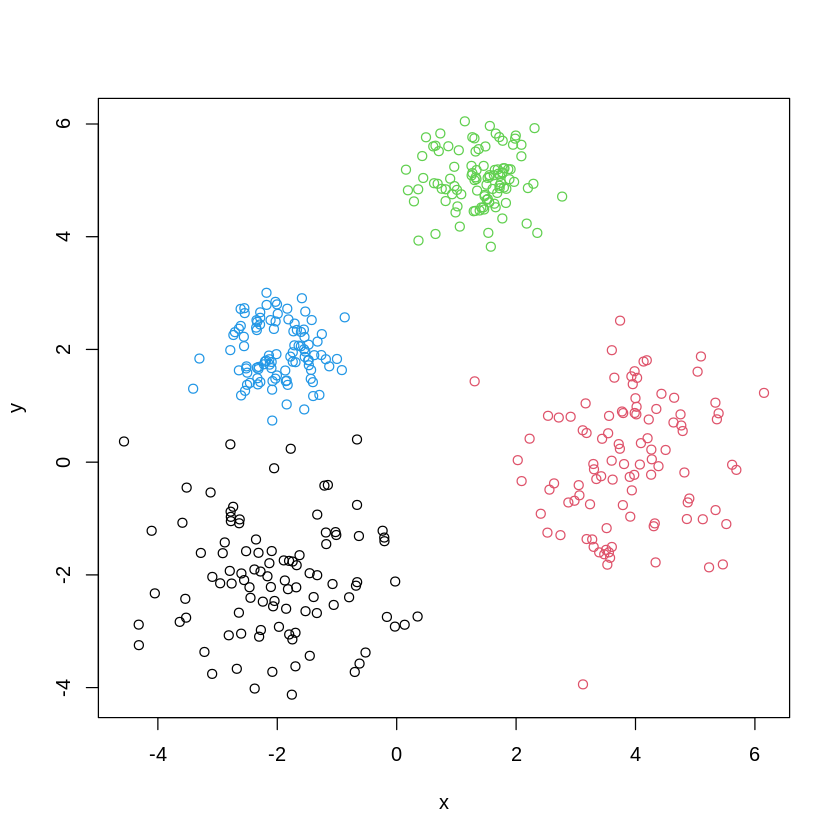

In [ ]:
gaus <- gen.gausianas(100)
plot(gaus[, 1:2], col = gaus[, 3])

In [ ]:
gap <- gap_statistic(gaus[,-3], 5, 100)
print(paste("Clusters segun gap: ", gap))

stab <- stability_method(gaus[,-3], 5, 20)
print(paste("Clusters segun stability: ", which.max(stab$stability.means)))

[1] "Clusters segun gap:  4"
[1] "Clusters segun stability:  5"


#### Comentarios
Vemos que GAP Statistic logra captar los 4 clusters, mientras que stability no.



In [ ]:
gap <- gap_statistic(iris[,-5], 5, 100)
print(paste("Clusters segun gap: ", gap))

stab <- stability_method(iris[,-5], 5, 20)
print(paste("Clusters segun stability: ", which.max(stab$stability.means)))

[1] "Clusters segun gap:  2"
[1] "Clusters segun stability:  4"


#### Comentarios
Como ya sabemos, iris posee 3 clases. Pero ninguno de los 2 algoritmos logra encontrar la cantidad indicada.



In [ ]:
gap <- gap_statistic(lampone.feat, 5, 100)
print(paste("Clusters segun gap: ", gap))

stab <- stability_method(lampone.feat, 5, 20)
print(paste("Clusters segun stability: ", which.max(stab$stability.means)))

[1] "Clusters segun gap:  2"
[1] "Clusters segun stability:  5"


#### Comentarios
Vemos como GAP Statistic marca que hay 2 clusters presentes, mientras que stability marca un errado 5 (ya empiezo a dudar de si esta correcto mi algoritmo, por la disparidad de resultados).



## Ejercicio 4

Para este ejercicio, generé un dataset utilizando un script en Python que descarga la información de diversos parámetros financieros de acciones desde Yahoo Finance. En este dataset, cada columna representa una estadística específica de las empresas, excepto la primera columna, que corresponde al ticker con el que la empresa cotiza en bolsa.

Mi objetivo principal era identificar si existe una separación clara entre las distintas acciones según sus estadísticas, incluyendo una selección de empresas de interés a nivel mundial.

In [177]:
stocks <- read.csv('sp500metrics.csv')
head(stocks)

,ticker,trailing_pe,forward_pe,dividend_yield,avg_volume,market_cap,price_to_book,trailing_eps,forward_eps,beta
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GGAL,23.400000,7.558989,0.0489,1018017,7704870912,0.020863239,2.30,7.12,1.591
2,YPF,14.767676,6.288172,0.0000,1750962,13460400128,0.001212389,1.98,4.65,1.472
3,BMA,10.677897,7.829052,0.2723,286709,6106185216,0.015866982,7.42,10.12,1.496
4,BBAR,24.396826,11.385185,0.1112,773390,3776854528,0.004537190,0.63,1.35,1.332
5,SUPV,8.678572,8.678572,0.0175,1176428,994064448,0.006564800,1.12,1.12,1.595
6,PAM,7.778271,9.006419,0.0000,219196,4451104768,29.944517000,9.02,7.79,1.000


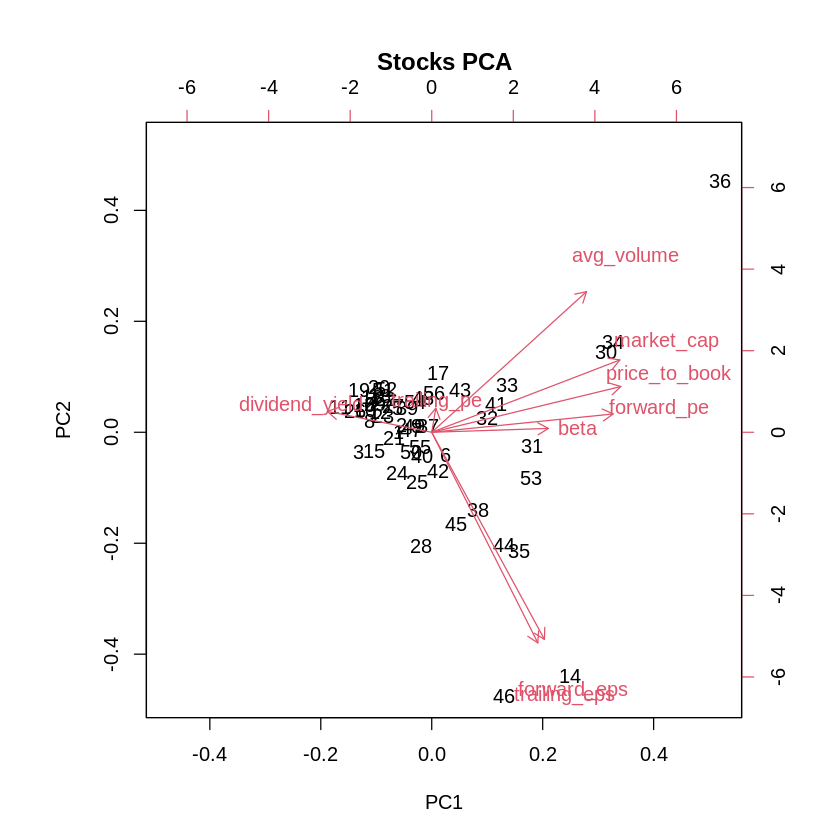

In [178]:
stocks.feats = stocks[,-1]

stocks.pca<-prcomp(stocks.feats, scale = T)
biplot(stocks.pca, main= "Stocks PCA")

Al analizar el PCA, observé que la entrada 36 parecía ser un outlier, ya que se encontraba considerablemente alejada del resto de los datos. Debido a esto, decidí eliminarla. Poco inesperado, se trataba de NVIDIA, empresa que viene teniendo unos años particulares en la bolsa cuanto menos.

La eliminación de esta entrada mejoró notablemente la dispersión en el gráfico, haciendo las agrupaciones mucho más claras y definidas. Por lo tanto, considero que la decisión de remover esta entrada fue acertada.

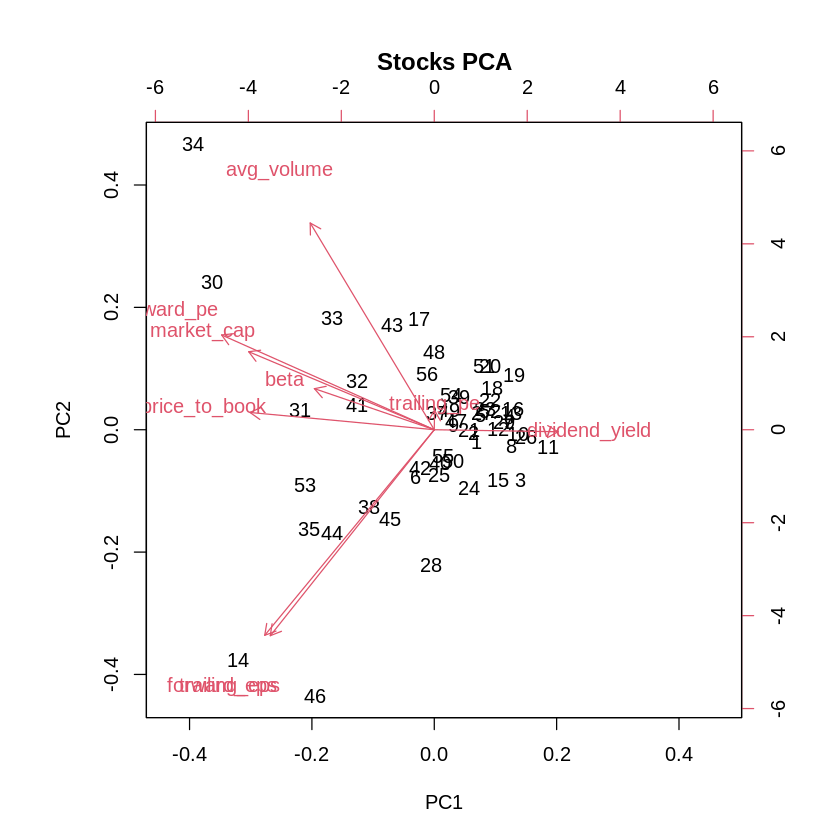

In [179]:
stocks <- stocks[-c(36),]
stocks.feats <- stocks[,-1]

stocks.pca<-prcomp(stocks.feats, scale = T)
biplot(stocks.pca, main= "Stocks PCA")

Al utilizar la GAP Statistic, ya que no confio mucho en mi algoritmo de stability, indica que lo más adecuado sería utilizar 2 clusters.

In [180]:
gap <- gap_statistic(stocks.feat, 10, 100)
print(paste("Clusters segun gap: ", gap))

[1] "Clusters segun gap:  2"


Vemos que la variable que mejor parece separar los datos en 2 clusters es Market-Cap, que corresponde al valor bursatil de la empresa. (Acciones x Precio de la accion).

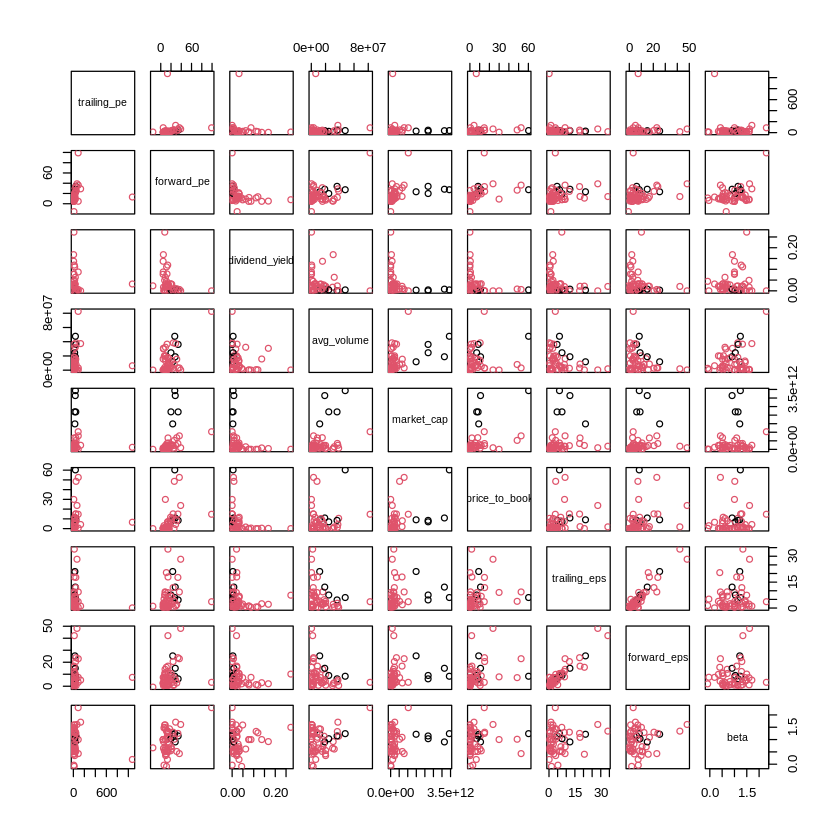

In [187]:
kmeans <- kmeans(stocks.feats, centers = 2, nstart = 10)
plot <- plot(stocks.feats, col = kmeans$cluster)

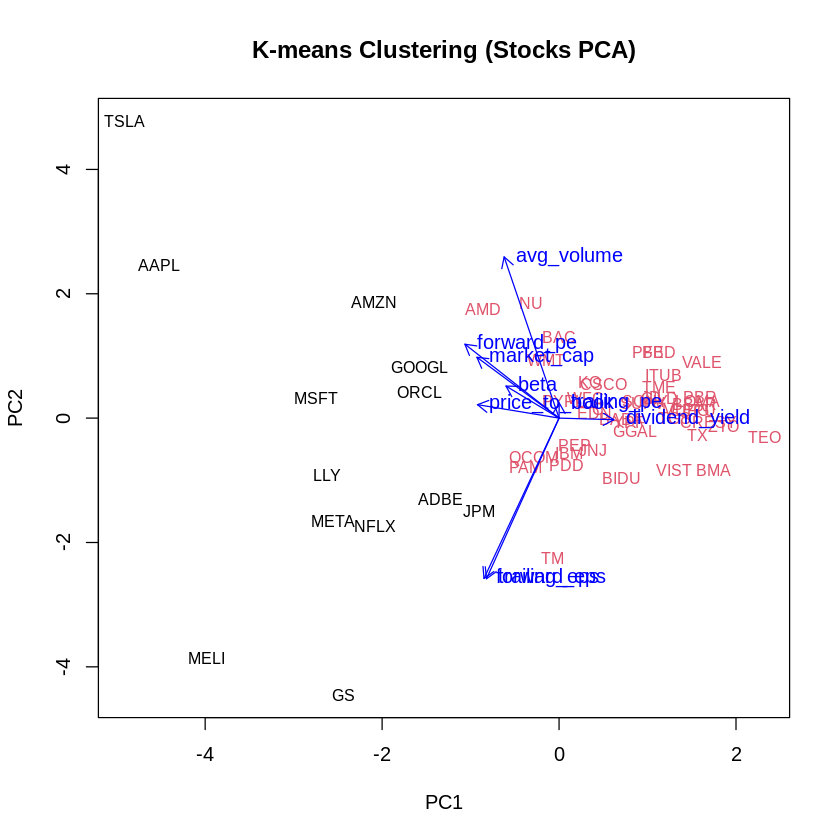

In [181]:
kmeans <- kmeans(stocks.pca$x, centers = 2, nstart = 10)

tickers <- stocks[, 1]

plot(stocks.pca$x[, 1:2], type = "n",
     xlab = "PC1", ylab = "PC2",
     main = "K-means Clustering (Stocks PCA)")

text(stocks.pca$x[, 1], stocks.pca$x[, 2],
     labels = tickers,
     col = kmeans$cluster,
     cex = 0.8)  # Adjust cex for text size if needed

arrows(0, 0, stocks.pca$rotation[, 1] * max(stocks.pca$x[, 1]),
       stocks.pca$rotation[, 2] * max(stocks.pca$x[, 2]),
       col = "blue", length = 0.1)

text(stocks.pca$rotation[, 1] * max(stocks.pca$x[, 1]),
     stocks.pca$rotation[, 2] * max(stocks.pca$x[, 2]),
     labels = rownames(stocks.pca$rotation), col = "blue", pos = 4)

Estos son los dos clusters generados utilizando K-means. Buscandole el sentido a los resultados, lo que más pude observar es que en el cluster de la izquierda se agrupan empresas muy consolidadas, con un gran valor bursátil, y todas pertenecientes a USA.

En cambio, en el cluster de la derecha se encuentran empresas de mercados emergentes, que aún no están tan establecidas.

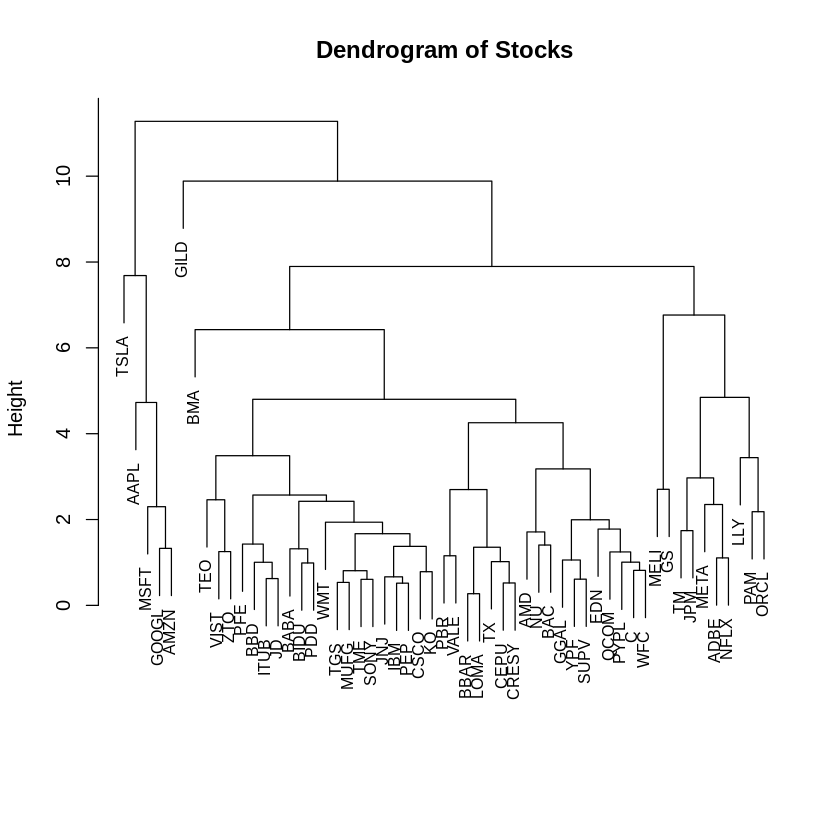

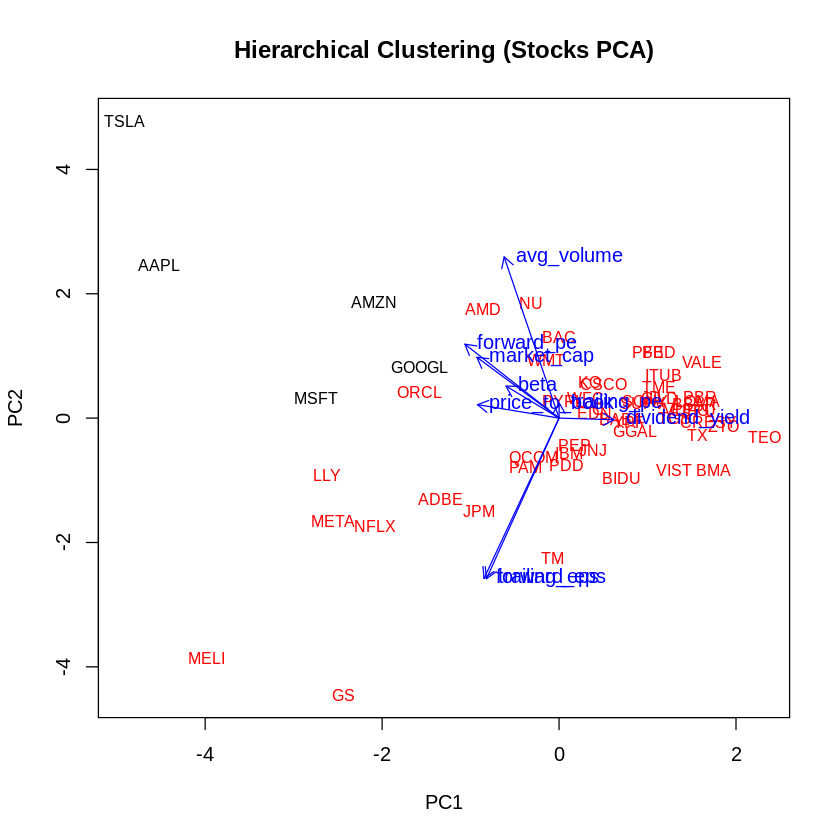

In [185]:
hc <- hclust(dist(stocks.pca$x), method = "complete")

tickers <- stocks[, 1]

plot(hc, labels = tickers, main = "Dendrogram of Stocks", xlab = "", sub = "", cex = 0.8)

hc_clusters <- cutree(hc, k = 2)

cluster_colors <- c("red", "black")
point_colors <- cluster_colors[hc_clusters]

plot(stocks.pca$x[, 1:2], type = "n",
     xlab = "PC1", ylab = "PC2",
     main = "Hierarchical Clustering (Stocks PCA)")

text(stocks.pca$x[, 1], stocks.pca$x[, 2],
     labels = tickers,
     col = point_colors,
     cex = 0.8)

arrows(0, 0, stocks.pca$rotation[, 1] * max(stocks.pca$x[, 1]),
       stocks.pca$rotation[, 2] * max(stocks.pca$x[, 2]),
       col = "blue", length = 0.1)

text(stocks.pca$rotation[, 1] * max(stocks.pca$x[, 1]),
     stocks.pca$rotation[, 2] * max(stocks.pca$x[, 2]),
     labels = rownames(stocks.pca$rotation), col = "blue", pos = 4)


Me sorprendió que, al utilizar clustering jerárquico, se separaran en una sola clase 5 de las "magníficas 7", las acciones con mayor capitalización bursátil. (Quedarían fuera NVIDIA, que fue eliminada como outlier, y META, que no logró entrar en el cluster).